<a href="https://colab.research.google.com/github/Alekhyahari2205/Image-Classification-ANN-CNN/blob/main/ImageClassfication_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Image Classification**

**Aritifical Neural Networks and Convolutional Neural Networks**

In [53]:
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [54]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [55]:
X_train.shape

(50000, 32, 32, 3)

In [56]:
X_test.shape

(10000, 32, 32, 3)

In [57]:
y_train.shape
#50k samples and 1 dimensional array

(50000, 1)

In [58]:
y_train[:5] #checking out the first 5 samples

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [59]:
y_train = y_train.reshape(-1,) #flatten it to 1 dimensional array
y_train.shape

(50000,)

In [60]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [61]:
classes[9]

'truck'

**DATA EXPLORATION PART**



In [62]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2)) #trying to reduce the size of image
  plt.imshow(X[index]) #this will show the image mentioned in 1st index
  plt.xlabel(classes[y[index]])

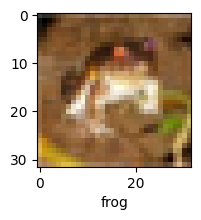

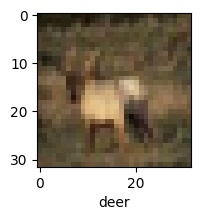

In [63]:
plot_sample(X_train, y_train, 0)
plot_sample(X_train, y_train, 3)

**DATA NORMALIZATION PART**

In [64]:
#divide each pixel value by 255 when ever there is a image to normalize it into 0 to 1 range.
X_train = X_train/255
X_test = X_test/255 #cause we are dividing it with 255 pixels

**Building Simple Artificial Neural network Model**

In [65]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation ='relu'),  #deep layer 1
    keras.layers.Dense(1000, activation = 'relu'), #deep layer 2
    keras.layers.Dense(10, activation = 'sigmoid') #last year which has 10 outputs
])
model.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])  #if y is directorly a value we use sparse categorical cross entropy
model.fit(X_train, y_train, epochs = 5) #accuracy is 49 which is very low, that means artificial neural network is performing very bad.


Epoch 1/5
1563/1563 [==============================] - 187s 119ms/step - loss: 1.8138 - accuracy: 0.3551
Epoch 2/5
1563/1563 [==============================] - 180s 115ms/step - loss: 1.6228 - accuracy: 0.4261
Epoch 3/5
1563/1563 [==============================] - 178s 114ms/step - loss: 1.5417 - accuracy: 0.4551
Epoch 4/5
1563/1563 [==============================] - 190s 122ms/step - loss: 1.4822 - accuracy: 0.4765
Epoch 5/5
1563/1563 [==============================] - 182s 117ms/step - loss: 1.4333 - accuracy: 0.4945


**IMPLEMENTATION OF CONVOLUTIONAL NEURAL NETWORK (CNN)**

In [66]:
cnn_model = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32,  kernel_size = (3,3), activation ='relu', input_shape = (32,32,3)),#filters = feature maps
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64,  kernel_size = (3,3), activation ='relu'), #filters = feature maps
    layers.MaxPooling2D((2,2)),  #POOLING DOWN SAMPLES AND PROVIDES MAXIMUM VALUE IN 2,2 MATRIX.
    #Dense
    layers.Flatten(),
    layers.Dense(64, activation ='relu'),  #deep layer 1 which provides only postive values and assumes negative values to be 0
    layers.Dense(10, activation = 'softmax'), #deep layer 2 - Normalizing in such a way that the total sum is 1 and the values are between 0 to 1.
     #last year which has 10 outputs
    ])


In [67]:
cnn_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [68]:
cnn_model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 84s 53ms/step - loss: 1.4659 - accuracy: 0.4748
Epoch 2/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.1190 - accuracy: 0.6079
Epoch 3/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9892 - accuracy: 0.6556
Epoch 4/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.9081 - accuracy: 0.6825
Epoch 5/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8430 - accuracy: 0.7064
Epoch 6/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.7876 - accuracy: 0.7260
Epoch 7/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.7401 - accuracy: 0.7408
Epoch 8/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.6917 - accuracy: 0.7587
Epoch 9/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.6513 - accuracy: 0.7721
Epoch 10/10
1563/1563 [==============================] - 80s 51m

In [69]:
cnn_model.evaluate(X_test, y_test)  #Accuracy obtained through CNN is almost 70%

313/313 [==============================] - 6s 19ms/step - loss: 0.9266 - accuracy: 0.6973


[0.9265678524971008, 0.6973000168800354]

In [70]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

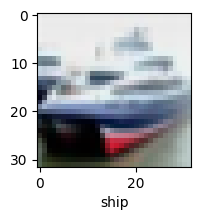

In [71]:
plot_sample(X_test, y_test,1)

In [72]:
y_pred = cnn_model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 15ms/step


array([[4.7030986e-05, 1.3672036e-06, 5.0478280e-03, 8.9060301e-01,
        1.4908371e-03, 9.8374501e-02, 3.0622832e-03, 1.6769591e-05,
        1.3515125e-03, 4.8164411e-06],
       [2.5225328e-02, 7.3588389e-01, 8.0686717e-05, 5.2773868e-07,
        2.4597685e-07, 3.5227519e-08, 6.8027525e-08, 1.8196594e-08,
        2.3877522e-01, 3.4114473e-05],
       [1.0056905e-01, 1.2860996e-01, 7.4311619e-04, 1.0615108e-02,
        4.1859909e-03, 5.7660689e-04, 1.2872479e-04, 1.3129985e-03,
        7.1675938e-01, 3.6499016e-02],
       [8.3924407e-01, 2.2279560e-04, 1.0873072e-01, 3.9529917e-03,
        2.2810081e-02, 4.4650362e-05, 1.5414317e-04, 7.8835321e-05,
        2.4354391e-02, 4.0732001e-04],
       [2.9592386e-06, 1.0012039e-06, 1.8146839e-02, 1.9379772e-02,
        6.8938524e-01, 8.3200738e-04, 2.7224010e-01, 2.4400870e-07,
        1.1733274e-05, 1.4134799e-08]], dtype=float32)

In [73]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 4]

In [74]:
y_test[:5] #as our accuracy is almost 70%, it makes few mistakes which is fine.

array([3, 8, 8, 0, 6], dtype=uint8)

'cat'

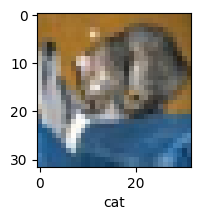

In [75]:
plot_sample(X_test, y_test,0)
classes[y_classes[0]]   #its correct, the image predicted is cat !

'deer'

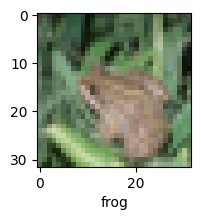

In [76]:
plot_sample(X_test, y_test,4)
classes[y_classes[4]] #the image provided is frog and the model predicted it to be frog
